In [33]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()

In [3]:
df = pd.read_csv(os.path.join(p_cwd, "data","clean_phen_data.csv"))

In [4]:
df.head()

,s_id,provider_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,cult_season,affected_flag,qc_flag,qc_ori_flag
0,5144,101,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,2,1951-01-02,0,0,0,0
1,2255,101,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,5,1951-01-05,0,0,0,0
2,1967,101,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,6,1951-01-06,0,0,0,0
3,4014,101,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,7,1951-01-07,0,0,0,0
4,512,101,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,10,1951-01-10,0,0,0,0


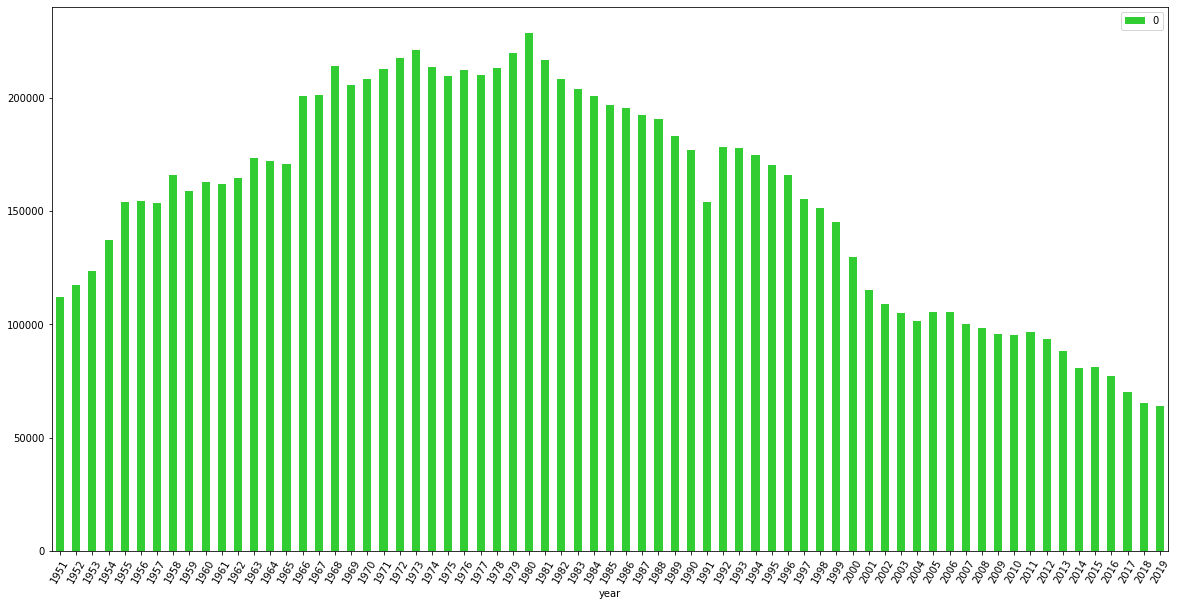

In [38]:
obs_plot = pd.DataFrame(df.groupby(by='year').size()).plot.bar(figsize=(20,10), color='limegreen', rot=60)
plt.savefig(os.path.join(p_cwd, "output","images","observations_plot.jpg"), dpi=300,
        orientation='portrait')

In [5]:
lst_stations = sorted(set(df['s_id'].to_list()))
print(len(lst_stations))

6773


In [6]:
file_path = os.path.join(p_cwd, "data","other_data","pep725_stations.csv")

In [7]:
df_stations = pd.read_csv(file_path, sep=';', encoding='utf-8-sig')

In [8]:
len(df_stations)

26597

In [9]:
df_stations_de = df_stations.loc[df_stations['s_id'].isin(lst_stations)]

In [10]:
len(df_stations_de)

6773

In [11]:
df_stations_de.head(10)

,s_id,provider_id,country_id,nat_id,lon,lat,alt,alt_dem,qc_flag,name,lastmod
0,1,101,1,11110000,9.43333,54.7667,25,34,1,"Flensburg, kreisfreie Stadt Flensburg",2017-03-14 12:42:00
1,2,101,1,11120000,10.15000,54.4000,25,31,1,Kiel-Pries,2017-03-14 12:44:00
2,3,101,1,11120001,10.15000,54.3333,29,29,1,Kiel-Düsternbrook,2017-03-14 12:44:00
3,4,101,1,11120002,10.05000,54.3167,30,32,1,Kiel-Mettenhof,2017-03-14 12:44:00
4,5,101,1,11130000,10.68330,53.8833,10,29,1,Lübeck-Schlutup,2017-03-14 12:45:00
5,6,101,1,11130001,10.71670,53.8333,13,11,1,Lübeck-Sankt Lorenz (Nord),2017-03-14 12:45:00
6,7,101,1,11130002,10.63330,53.8333,10,16,1,Lübeck-Sankt Jürgen,2017-03-14 12:45:00
7,8,101,1,11140000,9.98333,54.0833,25,19,1,"Neumünster, kreisfreie Stadt Neumünster",2017-03-14 12:45:00
8,9,101,1,11311140,9.70000,54.4333,25,32,1,Ascheffel,2017-03-14 12:45:00
9,10,101,1,11311180,9.70000,54.3333,15,15,1,Borgstedt b. Rendsburg,2017-03-14 12:45:00


In [12]:
df_stations_de['nat_id'].unique()

array(['11110000', '11120000', '11120001', ..., '19031', '19101', '15993'],
      dtype=object)

In [13]:
df_stations_de.drop(['provider_id', 'country_id', 'nat_id', 'alt', 'alt_dem',
                  'qc_flag', 'lastmod'], axis=1, inplace=True)

/Users/giudittaparolini/anaconda3/envs/testenv/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
df_stations_de

,s_id,lon,lat,name
0,1,9.43333,54.7667,"Flensburg, kreisfreie Stadt Flensburg"
1,2,10.15000,54.4000,Kiel-Pries
2,3,10.15000,54.3333,Kiel-Düsternbrook
3,4,10.05000,54.3167,Kiel-Mettenhof
4,5,10.68330,53.8833,Lübeck-Schlutup
...,...,...,...,...
21511,21528,14.06670,52.5500,Buckow/M?rkische Schweiz
21512,21529,12.10000,54.1000,Rostock-Gehlsdorf
21513,21530,12.23330,51.8000,Dessau-S?d
21514,21531,10.40000,50.7500,He?les


In [17]:
df_stations_de.to_csv(os.path.join(p_cwd, "data", "de_phen_stations.csv"), index=False)